# Estimating the cost of wall painting with basic computer vision techniques

### Introduction

Below is a demonstration of how I was able to precisely estimate the amount of paint and contractor labor needed to cover all of the walls in a one-storey building. This aproach shows that by using basic computer vision libraries (OpenCV and scikit-image) it's possible to automate the tedius process of construction takeoff and cost estimation.

It took me about a day to develop the following script. It completes estimation of a painting job in a 36-room building in a matter of about 5 seconds. It would take about 1.5 hours for a typical estimator to complete the same process by hand, which means the basic script below is 1,080x times faster.

### Implementation

In [238]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage import measure

%matplotlib inline
%config InlineBackend.figure_format='retina'

# set scale as 100 px per linear foot
SCALE = 100

# wall height in ft
HEIGHT = 8

# paint efficiency (sq ft per galon)
PAINT_EFFICIENCY = 400

# Prices are for Palo Alto, CA

# cost of 1 GA of paint
# https://www.homedepot.com/p/BEHR-Premium-Plus-Ultra-1-gal-M460-3-Big-Surf-Matte-Interior-Paint-and-Primer-in-One-175001/205282858
PAINT_COST_GALLON = 32.98

# labor efficiency (labor hours per square foot)
LABOR_EFFICIENCY = 0.07

# labor cost (dollars per square foot)
LABOR_COST = 0.37

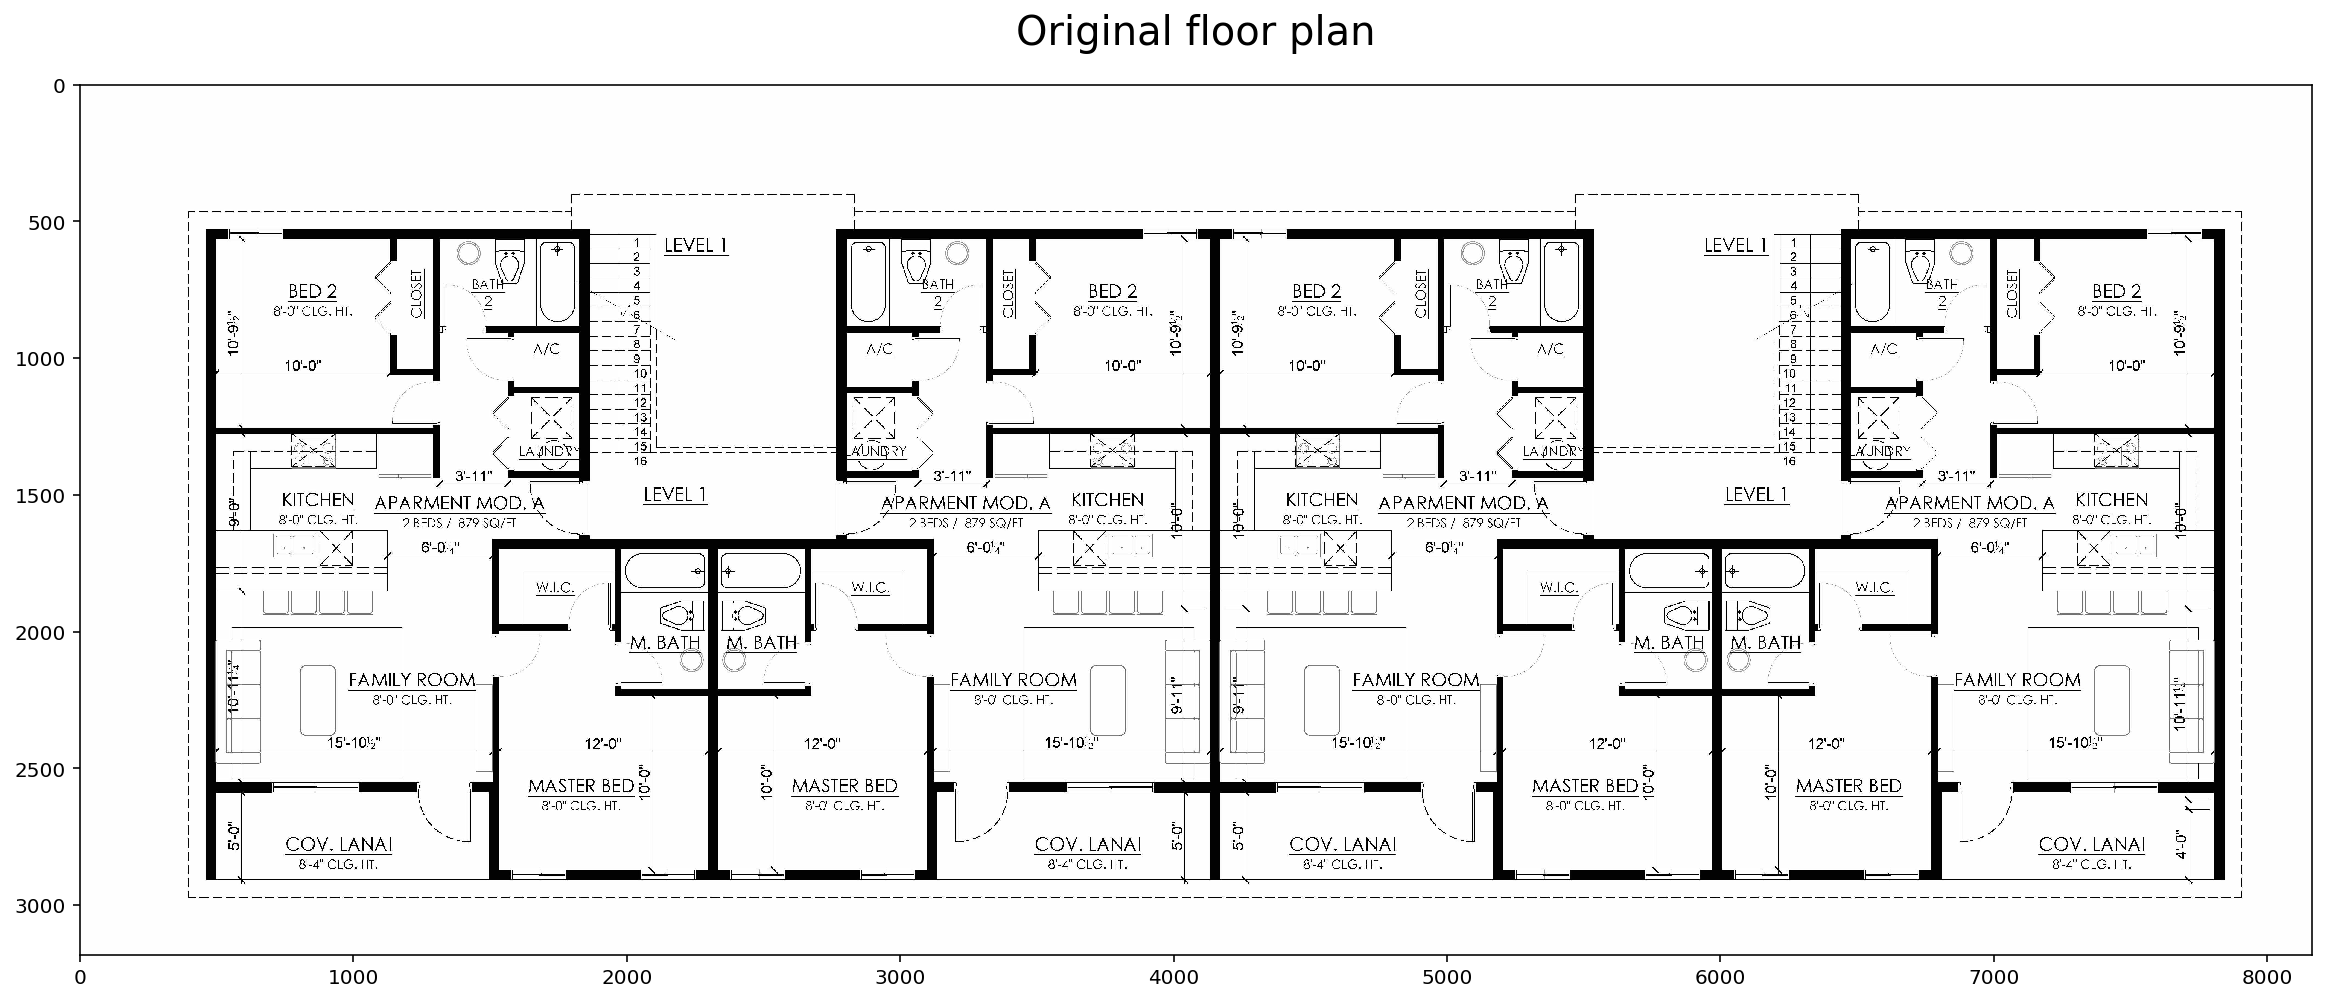

In [287]:
# read floorplan image and convert to grayscale
image = cv2.imread('floorplan.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plot
plt.figure(figsize=(20,10))
plt.title('Original floor plan', fontdict={'fontsize':20},pad=20.0)
plt.imshow(gray, cmap='gray')

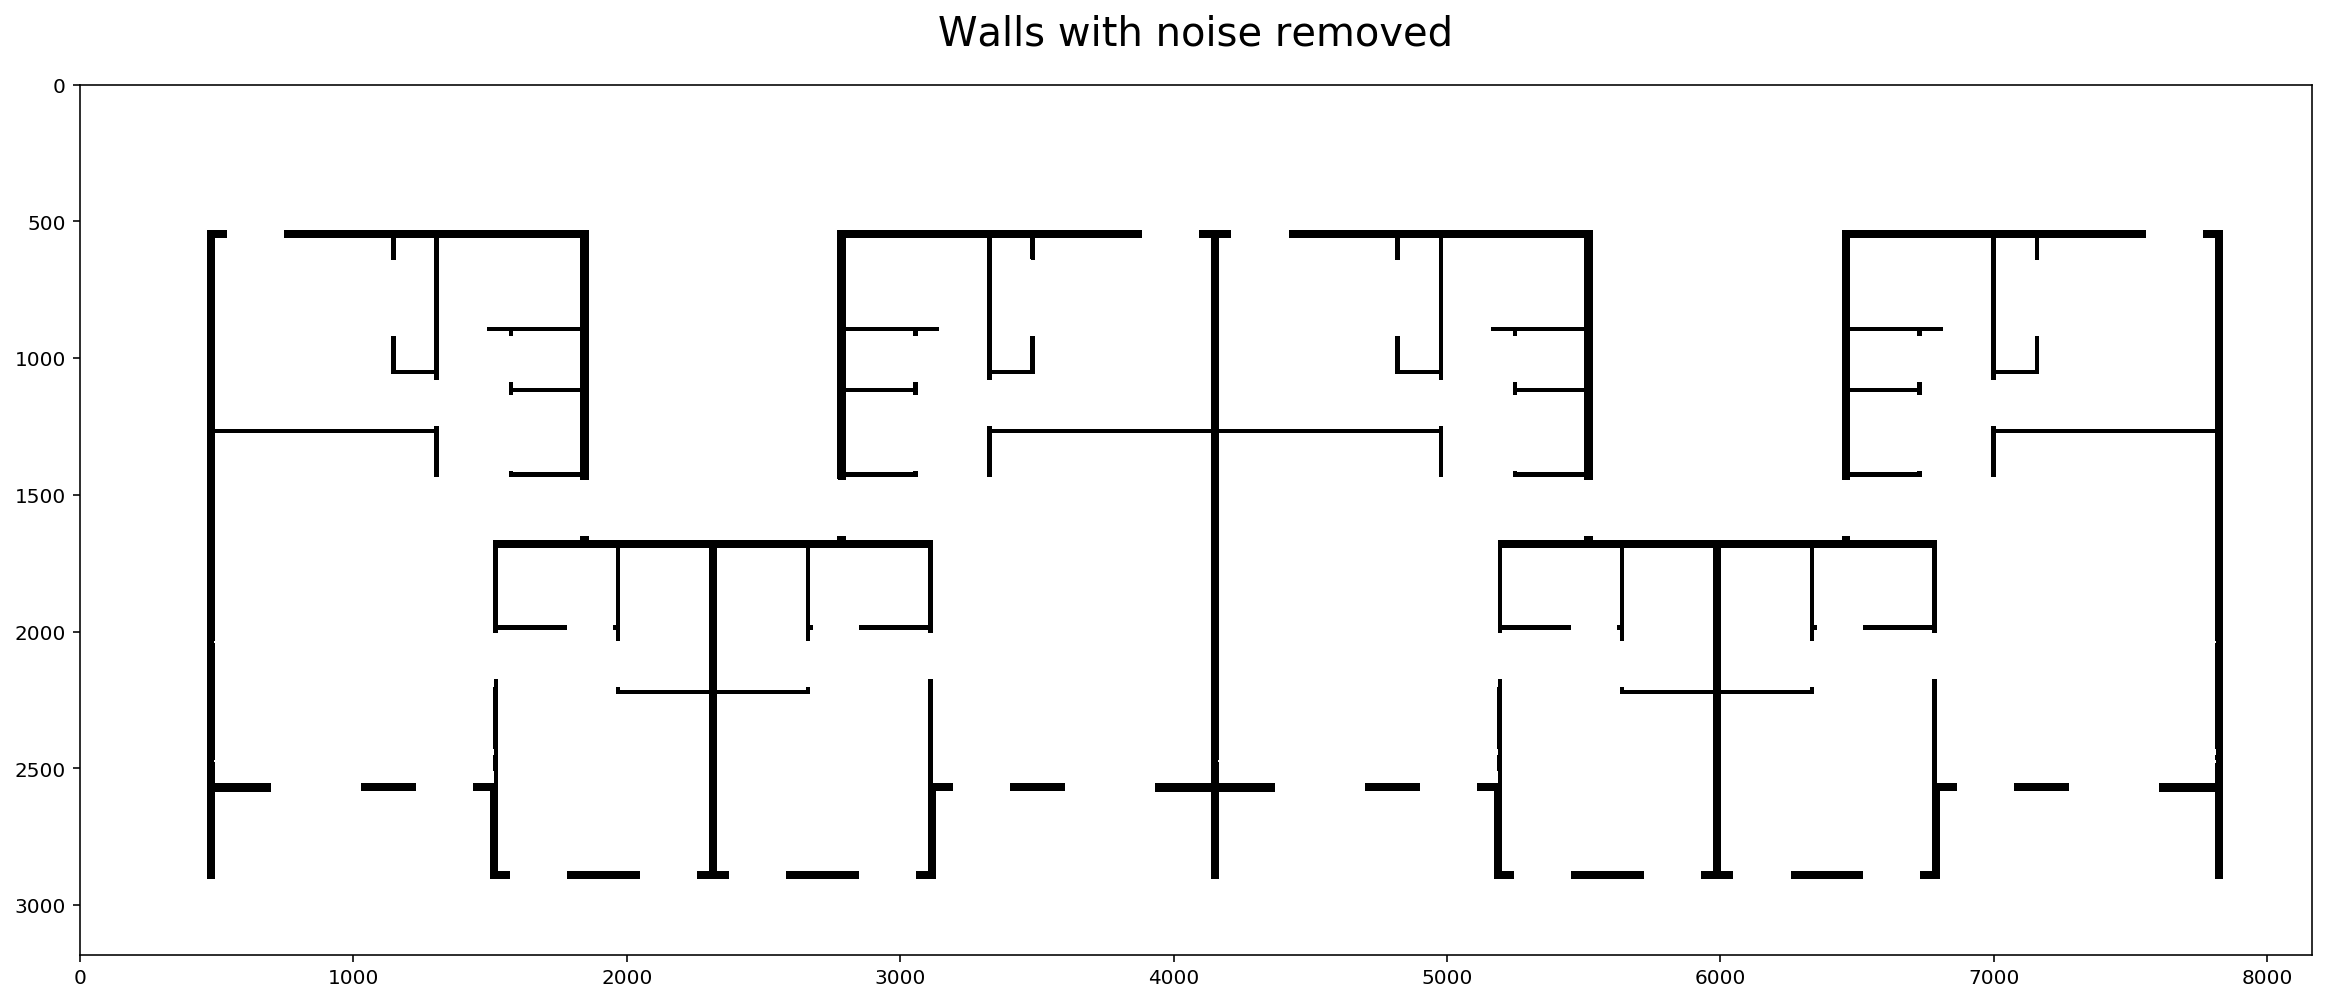

In [288]:
# dilate the image to isolate walls
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(gray,kernel,iterations = 2)

# convert to binary
ret,binary = cv2.threshold(dilation,127,255,cv2.THRESH_BINARY)

# display
plt.figure(figsize=(20,10))
plt.title('Walls with noise removed', fontdict={'fontsize':20},pad=20.0)
plt.imshow(binary, cmap='gray')

In [266]:
# find image contours
contours = measure.find_contours(binary, 0.8)


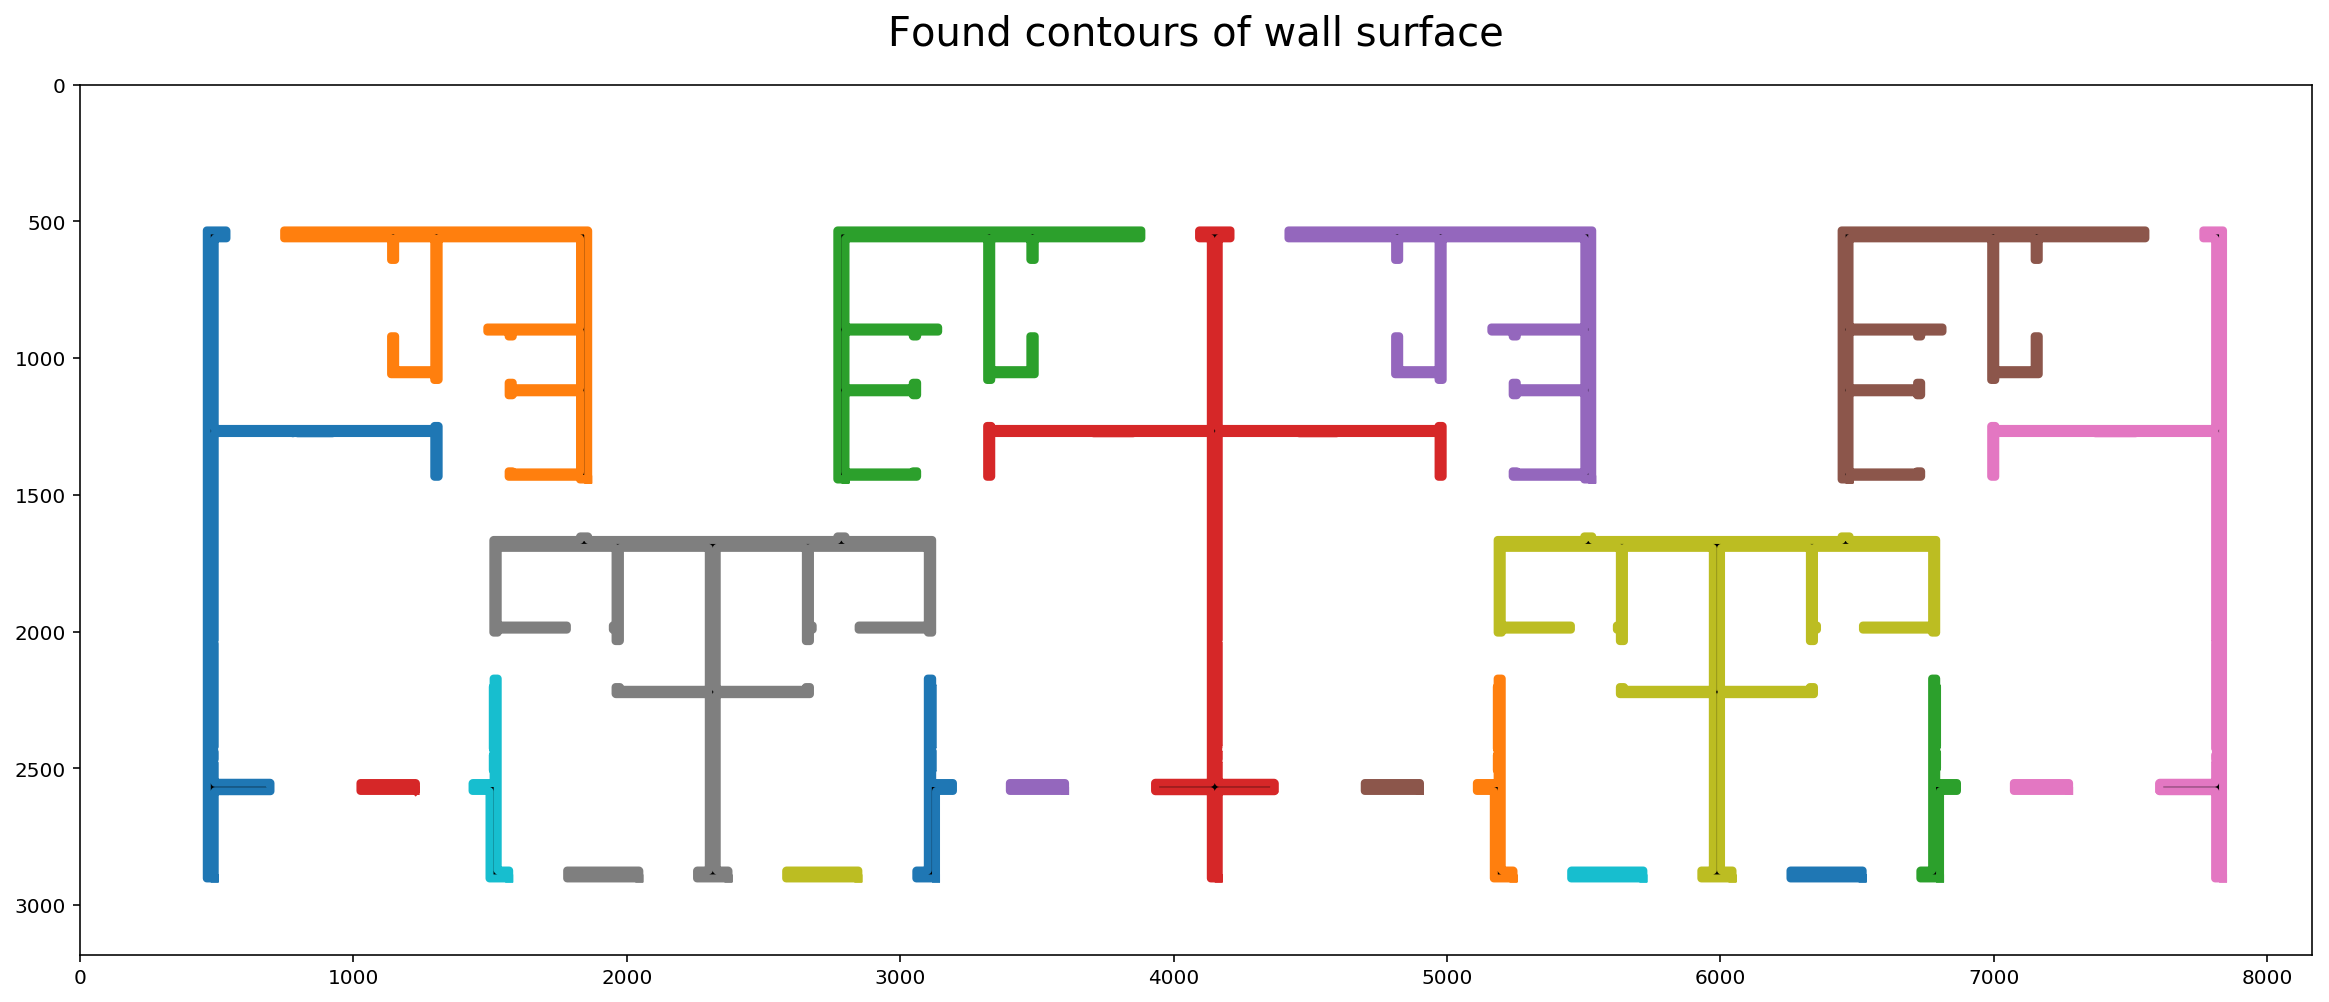

In [289]:


plt.figure(figsize=(20,10))
plt.title('Found contours of wall surface', fontdict={'fontsize':20},pad=20.0)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=4)
plt.imshow(binary, interpolation='nearest', cmap='gray')


In [268]:
perimeter = sum([len(contour) for contour in contours])
linear_feel_wall = perimeter / SCALE
sq_feet_wall = linear_feel_wall * HEIGHT
gallons_paint = sq_feet_wall / PAINT_EFFICIENCY
cost_of_paint = gallons_paint * PAINT_COST
labor_needed = LABOR_EFFICIENCY * sq_feet_wall
cost_of_labor = LABOR_COST * sq_feet_wall
total_cost = cost_of_paint + cost_of_labor

### Results

In [270]:
print()
print(" /// ----- /// CONSTRUCTION COST ESTIMATION  /// ----- ///")
print()
print()
print()
print("Surface area of wall to be painted:", "{0:.2f}".format(sq_feet_wall), "Sq. Ft.")
print()
print("----------------------------------------------------------------")
print()
print("Gallons of paint needed","{0:.2f}".format(gallons_paint),"Gal.")
print()
print("----------------------------------------------------------------")
print()
print("Total cost of paint from Home Depot: $","{0:.2f}".format(cost_of_paint),".")
print()
print("----------------------------------------------------------------")
print()
print("Labor hours required to paint all walls:","{0:.2f}".format(labor_needed),"hours.")
print()
print("----------------------------------------------------------------")
print()
print("Total cost of labor in Palo Alto: $","{0:.2f}".format(cost_of_labor),".")
print()
print("----------------------------------------------------------------")
print()
print("Total cost of the project: $","{0:.2f}".format(total_cost),".")
print()
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")


 /// ----- /// CONSTRUCTION COST ESTIMATION  /// ----- ///



Surface area of wall to be painted: 7047.44 Sq. Ft.

----------------------------------------------------------------

Gallons of paint needed 17.62 Gal.

----------------------------------------------------------------

Total cost of paint from Home Depot: $ 581.06 .

----------------------------------------------------------------

Labor hours required to paint all walls: 493.32 hours.

----------------------------------------------------------------

Total cost of labor in Palo Alto: $ 2607.55 .

----------------------------------------------------------------

Total cost of the project: $ 3188.61 .

----------------------------------------------------------------
----------------------------------------------------------------
